# Tarea 2

In [533]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q
from scipy import integrate

## 1.

In [519]:
def fc(z):
    return 1j*z

In [520]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)

In [521]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])


In [522]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+k3*h_)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [523]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])


<IPython.core.display.Javascript object>


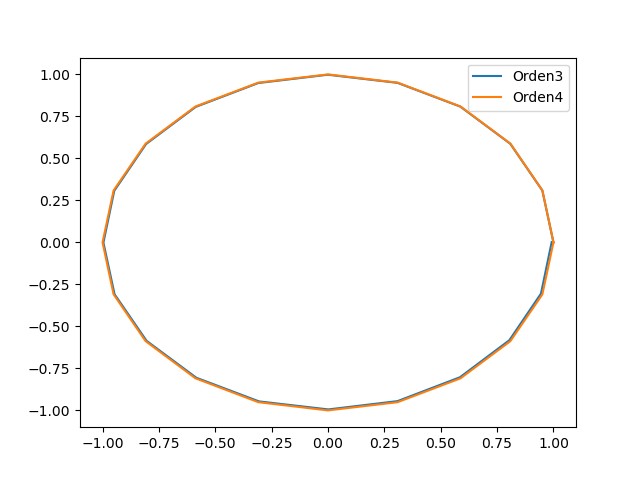

In [524]:

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])

plt.plot(Re3,Im3,label="Orden3")
plt.plot(Re4,Im4,label="Orden4")
plt.legend()

Como se evidencia en la gráfica anterior, los algoritmos de Runge-Kutta de tercer y cuerto orden se aproximan bastante a la gráfica original.

## 2.

##### a) 
Muestre que el error del método está dado por:

$$
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n + \epsilon_{n-1}=0\\
$$
donde
$$
a'_n=\frac{\partial a}{\partial x}
$$


### Solución:

Dado que el método de Verlet parte de $x_{n+1}=2x_n-x_{n-1}+h^2a_n+ \mathscr{O}(h^4)$ se puede definir $x_n=\bar x_n +\epsilon_n$. Se puede reemplazar esta última en la expresión original de Verlet de modo que se obtendría:


$$
\begin{align*}
\bar x_{n+1} +\epsilon_{n+1} &=2(\bar x_n +\epsilon_n)-(\bar x_{n-1} +\epsilon_{n-1}) +h^2a_n+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n +2\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2a_n+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n +2\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2(a(\bar x_n)+\epsilon_n a'_n)+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n+(2+h^2a'_n)\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2a(\bar x_n)+\mathscr{O}(h^4)\\
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}&=- \bar x_{n+1}+2\bar x_n-\bar x_{n-1}+h^2a(\bar x_n)\\
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}&=h^2a(\bar x_n) +\mathscr{O}(h^4)
\end{align*}
$$

Y, sabiendo que $-h^2a(\bar x_n) =\mathscr{O}(h^4)$, te tendría: que,

$$
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}=0
$$

##### b)

Para el caso de un oscilador armónico clásico muestre que:

$$
\epsilon_{n+1}-2(1-R)\epsilon_n + \epsilon_{n-1}=0
$$

donde 

$$
2R=h^2\omega^2
$$

#### Solución:

Teniendo en cuenta que la aceleración para el caso de un momento armónico simple está descrito por la siguiente expresión.

$$
a(x)=-\omega^2 x
$$

y su derivada estaría dada por

$$
a'(x)=-\omega^2
$$

De manera que, si se reemplaza esta última expresión en la encontrada en el inciso a, se tendría lo siguiente

$$
\begin{align*}
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}&=0\\
\epsilon_{n+1}-(2+h^2(-\omega^2))\epsilon_n+\epsilon_{n-1}&=0\\
\epsilon_{n+1}-(2-h^2\omega^2)\epsilon_n+\epsilon_{n-1}&=0\\
\end{align*}
$$

Además, usando $2R=h^2\omega^2$, se llegaría a,
$$
\begin{align*}
\epsilon_{n+1}-(2-2R)\epsilon_n+\epsilon_{n-1}&=0\\
\epsilon_{n+1}-2(1-R)\epsilon_n+\epsilon_{n-1}&=0\\
\end{align*}
$$

##### c)

Usando la suposición de función potencia $\epsilon_n=\epsilon_0\lambda^n$, muestre que las raíces son:

$$
\lambda_{\pm}=1-R\pm \sqrt{R^2-2R}
$$

#### Solución

Tomando la expresión obtenida en el inciso b), se reemplaza $\epsilon_n=\epsilon_0\lambda^n$ allí, obteniendo,

$$
\begin{align*}
\epsilon_{n+1}-2(1-R)\epsilon_n+\epsilon_{n-1}&=0\\
\epsilon_0\lambda^{n+1}-2(1-R)(\epsilon_0\lambda^n)+\epsilon_0\lambda^{n-1}&=0\\
\epsilon_0 \lambda^{n-1}(\lambda^2 -2(1-R)\lambda+1)&=0\\
\lambda^2 -2(1-R)\lambda+1&=0
\end{align*}
$$

De modo que sus raíces estarían dadas por:
$$
\begin{align*}
\lambda_i&=\frac{2(1-R)\pm \sqrt{4(1-R)^2 -4)}}{2}\\
&=(1-R)\pm \sqrt{(1-R)^2-1}\\
&=1-R \pm \sqrt{1-2R+R^2-1}\\
&=1-R\pm \sqrt{R^2-2R}
\end{align*}
$$



##### d)

El valor de la estabilidad se obtiene para $|\lambda_\pm|=1$. Muestre que el paso de integración debe cumplir:

$$
h\leq \frac{2}{\omega}
$$


#### Solución

Teniendo en cuenta que el intervalo que garantiza la expresión de estabilidad es en $|\lambda_\pm|\leq 1$, se puede identificar que en R=2 el término radical se cancela y $\lambda=-1$, de modo que se cumple la estabilidad. Para revisar en qué intervalo se toma un valor arbitrario $a=1$ y $b=3$, con el fin de probar si la estabilidad se garantiza para valores mayores a 2 o menores a 2.

Usando a:

$$
\begin{align*}
\lambda_{\pm}&=1-R\pm\sqrt{R^2-2R}\\
&=1-1\pm \sqrt{R^2-2R}\\
&=\pm i
\end{align*}
$$

Usando b:
$$
\begin{align*}
\lambda_{\pm}&=1-R\pm\sqrt{R^2-2R}\\
&=1-3\pm \sqrt{3^2-2*3}\\
&=-2\pm \sqrt{9-6}\\
&=-2\pm \sqrt{3}
\end{align*}
$$

De modo que se evidencia que  usando R=a se cumple la estabilidad, pero en R=b no. De modo que se puede identificar que para valores en el intervalo $[0,2]$ se garantiza la estabilidad.

Por lo tanto, dado que $2R=h^2\omega^2$, se tendría lo siguiente,


$$
\begin{align*}
   2R&=h^2\omega^2\\
   R&=\frac{h^2\omega^2}{2}\\
   2&\geq \frac{h^2\omega^2}{2}\\
   h^2&\leq\frac{4}{\omega^2}\\
   h&\leq\sqrt{\frac{4}{\omega^2}}\\
   h&\leq\frac{2}{\omega}
\end{align*}
$$

##### e)

In [578]:
x0=1
dx0=1
w=np.pi

In [579]:
analitica=lambda x: np.cos(np.pi*x)+(np.sin(np.pi*x)/np.pi)

In [580]:
def f(x):
    return -x*np.pi**2

In [581]:
def GetVerlet(f,y0,dy0,xf,N):
    paso=(xf)/(N-1)
    xs=np.arange(0,xf+paso,paso)
    ys=np.zeros(len(xs))
    y_init=y0-paso*dy0+0.5*paso**2 *f(y0)
    ys[0]=y_init
    ys[1]=y0
    
    for i in range(1,N-1):
        ys[i+1]=2*ys[i]-ys[i-1]+f(ys[i])*paso**2
        
    return xs, ys
    

In [590]:
t=10
t_list=np.linspace(0,10,200)
N=200
t_good,x_good=GetVerlet(f,x0,dx0,t,N)
y_real=analitica(t_list)

In [556]:
def GetVerletInestable(f,y0,dy0,xf,paso):

    xs=np.arange(0,xf+paso,paso)
    ys=np.zeros(len(xs))
    y_init=y0-paso*dy0+0.5*paso**2 *f(y0)
    ys[0]=y_init
    ys[1]=y0
    
    for i in range(len(xs)-1):
        ys[i+1]=2*ys[i]-ys[i-1]+f(ys[i])*paso**2
        
    return xs, ys

In [591]:
t_bad,x_bad=GetVerletInestable(f,x0,dx0,t,0.65)

In [596]:
plt.plot(t_good,x_good,label="Verlet")
plt.plot(t_list,y_real,label="Analítica")
plt.set_title("Verlet Estable")
plt.legend()

<IPython.core.display.Javascript object>

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

<IPython.core.display.Javascript object>


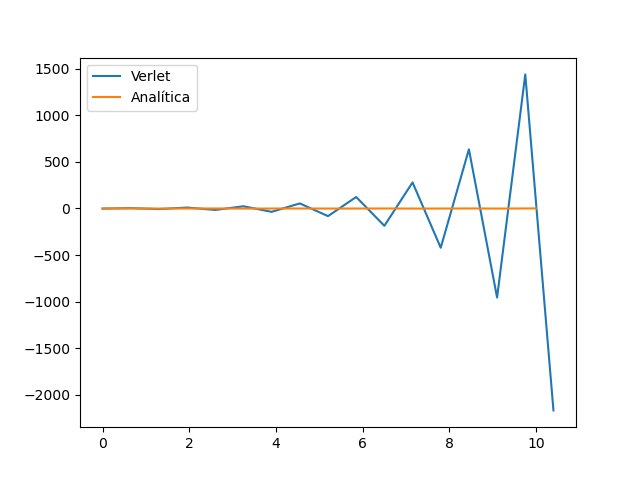

In [495]:
plt.plot(x2_inestable,y2_inestable,label="Verlet")
x2_inestable,y2_inestable=GetVerletInestable(f,x0,dx0,t,0.65)
plt.plot(t_list,y_real,label="Analítica")
plt.legend()

## 3.

Ecuación diferencial de Riccati:

$$
x^3y'=x^4y^2-2x^2y-1
$$

### Solución
Inicialmente se despeja $y'$, de modo que se tendría:
$$
\begin{align*}
y'&=xy^2-\frac{2y}{x}-\frac{1}{x^3}\\
\end{align*}
$$

Dado que es una ecuación de Riccatti, es necesario realizar un cambio de variable usando $y=y_1 +u^{-1}$ y dado que, según el enunciado $y_1=x^{-2}$, se puede reescribir como una ecuación diferencial lineal.

$$
y=x^{-2} +u^{-1}
$$

$$
y'=-2x^{-3} -u^{-2}u'
$$

Sustituyendo en la ED:
$$
\begin{align*}
-2x^{-3} -u^{-2}u'&=x(x^{-2} +u^{-1})^2-\frac{2(x^{-2} +u^{-1})}{x}-\frac{1}{x^3}\\
-2x^{-3} -u^{-2}u'&=x(x^{-4}+2x^{-2}u^{-1}+u^{-2})-\frac{2x^{-2}+2u^{-1}}{x}-\frac{1}{x^3}\\
-2x^{-3} -u^{-2}u'&=x^{-3}+2x^{-1}u^{-1}+xu^{-2}-\frac{2x^{-2}+2u^{-1}}{x}-\frac{1}{x^3}\\
-x^{-3} -u^{-2}u'&=x^{-3}+2x^{-1}u^{-1}+xu^{-2}-\frac{2x^{-2}+2u^{-1}}{x}\\
-2x^{-3} -u^{-2}u'&=xu^{-2}-2x^{-3}\\
 -u^{-2}u'&=xu^{-2}\\
 x=-u'
\end{align*}
$$

Entonces, a partir de u' se puede hallar u'

$$
\begin{align*}
u&=\int -x dx\\
&=\frac{-x^2}{2} +C
\end{align*}
$$

De modo que al reemplazar u, se tendría:
$$
\begin{align*}
y&=y_1 +u^{-1}\\
&=x^{-2} +\Big(\frac{-x^2}{2} +C \Big)^{-1}
\end{align*}
$$

Además por condiciones iniciales se tendría que:
$$
\begin{align*}
y(\sqrt{2})=0 &=\sqrt{2}^{-2} +\Big(\frac{-\sqrt{2}^2}{2} +C \Big)^{-1}\\
0&=2^{-1}+(-1+C)^{-1}\\
-(C-1)&=(0.5)^{-1}\\
C&=-2+1\\
C&=-1
\end{align*}
$$

Entonces la expresión final de y sería:
$$
\begin{align*}
&=x^{-2} -\Big(\frac{x^2}{2} +1 \Big)^{-1}
\end{align*}
$$

In [3]:
def f(x,y):
    return x*y**2-2*y*x**(-1)-1/x**3

In [21]:
N = 100
t = np.linspace(np.sqrt(2),10,N)
h = t[1] - t[0]


In [22]:
def GetEuler4(x,y,h):
    
    for i in range(1,len(x)):
        
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+(1/2)*h,y[i-1] + (1/2)*h*k1)
        k3 = f(x[i-1]+(1/2)*h,y[i-1] + (1/2)*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [23]:
y4 = np.zeros_like(t)
y4[0] = 0.
GetEuler4(t,y4,h)

In [24]:
def Solucion(x):
    return x**(-2)-(x**2/2 +1)**(-1)

sol=Solucion(t)

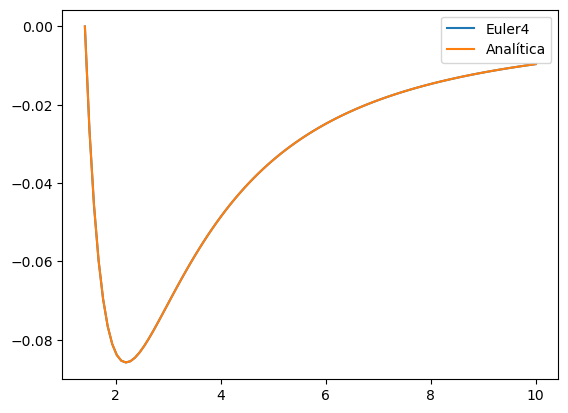

In [28]:
plt.plot(t,y4,label="Euler4")
plt.plot(t,sol,label="Analítica")
plt.legend()

## 4.

Resolver analíticamente la ecuación diferencial no lineal:

$$
\frac{du}{dt}=u^q , t\in [0,10]
$$

La solución exacta es: $u(t)=e^t$ para q=1 y $u(t)=(t(1-q)+1)^{\frac{1}{1-q}}$ para $q<1$ y $t(1-q)+1>0$.

### Solución:

#### Para q=1:

Se tendría la siguiente ecuación diferencial:

$$
\frac{du}{dt}=u
$$

De modo que al resolverla se tendría,

$$
\begin{align*}
\frac{du}{dt}&=u\\
u^{-1} du&=dt\\
ln(u)&=t+C\\
u(t)&=e^(t+C)\\
u(t)&=C_2e^t
\end{align*}
$$

tomando condiciones iniciales donde $u(0)=1$, entonces $C_2=1$, y se tendría lo siguiente,

$$
u(t)=e^{t}
$$

#### Para q<1 y t(1-q)+1>0:


Resolviendo el método de separación de variables se tiene que.

$$
\begin{align*}
\frac{du}{dt}&=u^{q}\\
\int u^{q} du&= \int dt\\
\frac{u^{-q+1}}{-q+1}&=t+C\\
u^{-q+1}&=(t+C)(-q+1)\\
u^{-q+1}&=-qt-qC+t+C\\
u^{-q+1}&=-qt-C_1+t+C\\
u^{-q+1}&=t(1-q)+C-C_1\\
u^{-q}+1&=t(1-q)+C_2\\
u&=[t(1-q)+C_2]^{\frac{1}{1-q}}
\end{align*}
$$

Por condiciones iniciales se tiene que $u(t)=1$, entonces $C_2=1$. Por ende, se llega a lo siguiente,

$$
u(t)=[t(1-q)+1]^{\frac{1}{1-q}}
$$


## 5.

De la analítica:

In [95]:
def u_menorq(t,q):
    return (t*(1-q)+1)**(1/(1-q))

In [96]:
t_5= np.linspace(0,10)
qs=[0.,0.2,0.4,0.7,0.9]

(0.0, 100.0)

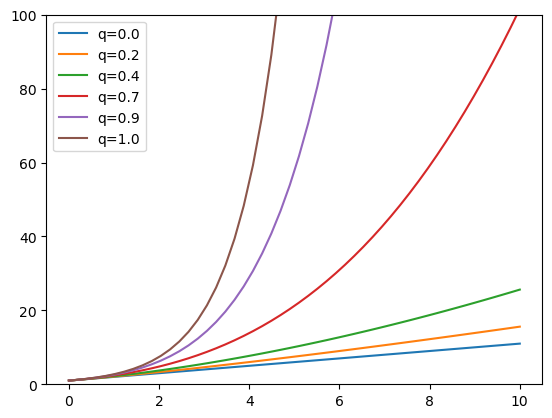

In [100]:
for i in range(len(qs)):
    plt.plot(t_5,u_menorq(t_5,qs[i]), label="q="+str(qs[i]))
    
plt.plot(t_5,np.exp(t_5),label="q=1.0")
plt.legend()
plt.ylim(0,100)

Usando RungeKutta

In [79]:
def func(u,q):
    return u**q

In [80]:
N = 100
t_5 = np.linspace(0,10,N)
h = t_5[1] - t_5[0]


In [81]:
def GetEuler4_5(x,y,h,q):
    
    for i in range(1,len(x)):
        
        k1 = func(y[i-1],q)
        k2 = func(y[i-1] + (1/2)*h*k1,q)
        k3 = func(y[i-1] + (1/2)*h*k2,q)
        k4 = func(y[i-1]+h*k3,q)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [82]:

qs1=[0.,0.2,0.4,0.7,0.9,1.]

(0.0, 100.0)

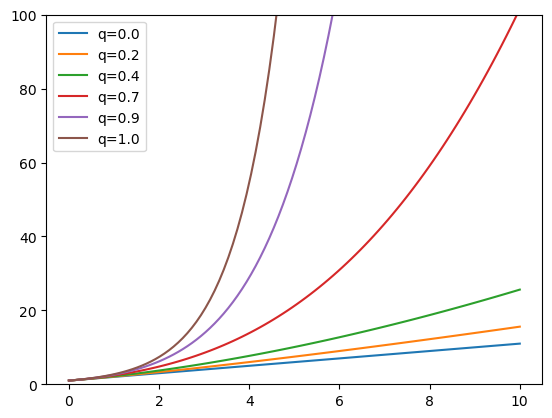

In [83]:
for i in range(len(qs1)):
    y5 = np.zeros_like(t_5)
    y5[0] = 1.
    GetEuler4_5(t_5,y5,h,qs1[i])
    plt.plot(t_5,y5, label="q="+str(qs1[i]))

    
    
plt.legend()
plt.ylim(0,100)

## 6.

a) Demostrar las ecuaciones 2.89 y 2.9.

##### 2.89:

Se quiere demostrar que

$\vec{r}(t+\Delta t)=\vec{r}(t)+\vec{v}(t)\Delta t+\frac {1}{2}\vec{a}(t)(\Delta t)^2$

Y

$\vec{v}(t+\Delta t)=\vec{v}(t)+\frac {\Delta t}{2}\vec{a}(t+ \Delta t)+\vec{a}(t)$


Para ello, se parte de la ecuacion de una serie de taylor  de orden dos, la cual esta dada por:

$f(x+ \Delta x)=F(x) + \Delta x f`(x) +f``(x)  \frac {(\Delta x)^2 }{2}$


No es necesario expandir mas terminos de la ecuación debido a que en el ejercicio solo conocemos hasta la segunda derivada, y hacer uso de la 3ra ya nos solicitaria información adicional con la cual no se cuenta. 




Si esta serie de taylor se aplica para la descripcion de la posicion, es decir, sea $f(x)=\vec{r}(t)$, $f`(x)= \vec{v}(t)$ y $f``(x)=  \vec{a}(t)$ se llega a que:


$\vec{r}(t+\Delta t)=\vec{r}(t)+\vec{v}(t) \Delta t+\vec{a}(t)*  \frac {(\Delta t)^2 }{2}$

Ahora, sea 


$ \int_{t}^{t+\Delta t}  \!  \, dt = \int_{t}^{t+\Delta t}  \! \vec{a}(t) \, dt $

Resolviendo la integral se obtiene 
$\vec{v}(t+\Delta t)- \vec{v}(t)= \frac { (\vec{a}(t+\Delta t)-\vec{a}(t))\Delta t}{2}$

Lo que equivale a:

$\vec{v}(t+\Delta t)=\vec{v}(t)+\frac {\Delta t}{2}\vec{a}(t+ \Delta t)+\vec{a}(t)$




##### 2.9:

Se busca demostrar las formulas dadas por:
$\vec{r}(0)=[a(1-e),0]$
y
$\vec{v}(0)=[0.,\sqrt{G* \frac {(1-e)}{a(1+e)}} ]$

donde e se refiere a excentricidad y esta dada por:


$e=\frac {c}{a}$


$c=e*a$


donde c es la semidistancia focal y a el semieje mayor de la elipse.


Se tiene que el cambio en la posicion, viene dado por,

$\vec{r}(0)=[r_x,r_y]$

donde si se espera que esta posicion este dada por el afelio se necesita su posicion en y=0 y en x viene dada por la distancia del afelio al sol, es decir, la suma entre la distancia del centro al foco y del centro al vertice donde se encuentra ubicado.


$r_x=c+a$
$r_x=ea+a$
$r_x=a(e+1)$

Por ende, la posición deberá estar descrita por:

$\vec{r}(0)=[a(1+e),0]$



Teniendo en cuenta que la energia mecanica total se conserva, es decir, es constante. Es posible partir de esta para realizar la demostracion. De esta manera se obtiene


$E=cte=\frac {1}{2}mv^2-\frac {GMm}{r}$

Donde M es la masa del sol y m la de mercurio. Es decir M tiene un valor de 1

Como la energia mecanica debe ser constante debe tener el mismo valor tanto en el perihelio como en el afelio, por ende,

$\frac {1}{2}mv_a^2-\frac {Gm}{r_a}=\frac {1}{2}mv_p^2-\frac {Gm}{r_p}$


de esta formula despejamos la velocidad en el afelio, que es la que nos interesa.

$\frac {1}{2}mv_a^2=\frac {Gm}{r_a}+\frac {1}{2}mv_p^2-\frac {Gm}{r_p}$

$v_a^2=\frac {2G}{r_a}+v_p^2-\frac {2G}{r_p}$



Asi como la energia mecanica se conserva, tambien se conserva el momento angular. 

$mr_av_a=mr_pv_p$

$v_p=\frac{r_av_a}{r_p}$

Sustituyendo en la formula de $v_a$ el valor de v_p y sabiendo por la demostracion anterior que $r_a=a(1+e)$, se obtiene que:

$v_a^2=\frac {2G}{a(1+e)}+(\frac{a(1+e)v_a}{r_p})^2-\frac {2G}{r_p}$

Se sabe ademas que el radio en el perihelio equivale a $r_p=a(1-e)$

$v_a^2=\frac {2G}{a(1+e)}+(\frac{a(1+e)v_a}{a(1-e)})^2-\frac {2G}{a(1-e)}$

$v_a^2=\frac {2G}{a(1+e)}+(\frac{(1+e)}{(1-e)})^2v_a^2-\frac {2G}{a(1-e)}$

Desdejando para $v_a$
$(1-(\frac{(1+e)}{(1-e)})^2)v_a^2=\frac {2G}{a(1+e)}-\frac {2G}{a(1-e)}$

$v_a=\sqrt{ \frac{\frac {2G}{a(1+e)}-\frac {2G}{a(1-e)}}{1-(\frac{(1+e)}{(1-e)})^2}}$

$v_a=\sqrt{ \frac{2G\frac{(a(1+e)-a(1-e)}{(a(1+e)(a(1-e))}}{1-(\frac{(1+e)}{(1-e)})^2}}$


$v_a=\sqrt{\frac {2Ga(1-e)}{a(1+e)((a(1-e)+a(1+e))}}$

$v_a=\sqrt{\frac {2Ga(1-e)}{a(1+e)(2a)}}$

$v_a=\sqrt{\frac {G(1-e)}{a(1+e)}}$

De esta manera se llega a la conclusion que la velocidad del afelio se encuentra descrita por:

$\vec{v}(0)=[0.,\sqrt{G* \frac {(1-e)}{a(1+e)}} ]$

In [403]:
G=4*np.pi**2
alpha=1.1e-8
e=0.20563
a=0.387098
def func(r):
    return -(G/np.linalg.norm(r)**3)*(1+ alpha/np.linalg.norm(r)**2)*r 

In [473]:
def VerletMercury(x0,dx0,paso):
    x_now=x0
    dx_now=dx0
    perihelio=[]
    tiempos=[]
    count=0.
    seguir=False
    
    while len(perihelio)<15:
        x_ant=x_now
        ddx_now=func(x_now)
        x_now=x_now+dx_now*paso + (1/2)*ddx_now*paso**2
        ddx_fut=func(x_now)
        dx_now=dx_now+(paso/2)*(ddx_fut+ddx_now)
        
        norm_xnow=np.linalg.norm(x_now)
        norm_xant=np.linalg.norm(x_ant)
        count+=paso
        
        if norm_xnow<norm_xant:
            seguir=True
            
            
        else:
            if seguir:
                angle=np.arctan(x_now[1]/x_now[0])*(360/(2*np.pi))
                perihelio.append(angle)
                tiempos.append(count)
                seguir=False
            
    tiempos=np.array(tiempos)
    perihelio=np.array(perihelio)
    
    return tiempos,perihelio

In [478]:
r0=np.array((a*(1+e),0))
v0=np.array((0,np.sqrt(G*(1-e)/(a*(1+e)))))
paso=5e-8
tiempos, perihelio=VerletMercury(r0,v0,paso)


In [479]:
def Regresion(I,V):
    n=len(I)

    sumI = np.sum(I)
    sumV = np.sum(V)

    m = (np.sum(I*V) - (sumI*sumV)/ n)/(np.sum(I**2) - (sumI**2)/n)
    b = (sumV - m*sumI)/n 
    
    IF=I.reshape((len(I),1))
    VF=V.reshape((len(V),1))
    model=linear_model.LinearRegression()
    model.fit(IF,VF)
    pred=model.predict(IF)
    R2=r2_score(VF,pred)
    
    return(m,b,R2)

In [482]:
reg=Regresion(tiempos,perihelio)
ys=reg[0]*tiempos+reg[1]

<IPython.core.display.Javascript object>


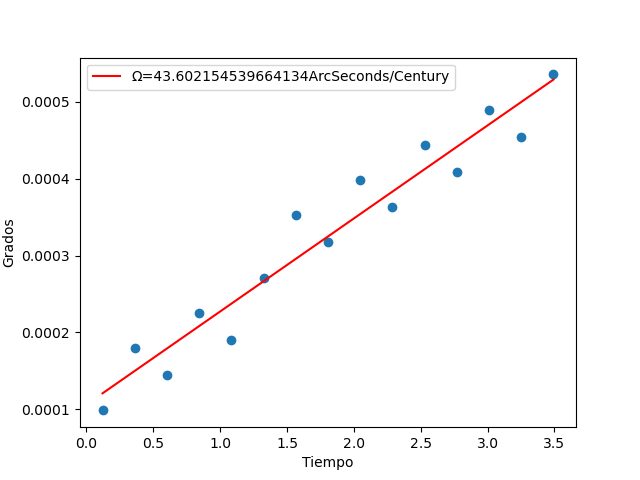

In [483]:
plt.scatter(tiempos,perihelio)
plt.plot(tiempos,ys,color="red", label="Ω="+str(reg[0]*360000)+"ArcSeconds/Century")
plt.xlabel("Tiempo")
plt.ylabel("Grados")
plt.legend()
